# K-NN Testing: Learning K-Nearest Neighbors

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

### Generate the Data

In [2]:
x_total = [i for i in range(20)]
y_total = [1, 4, 3, 2, 5, 9, 8, 7, 4, 7, 5, 10, 13, 10, 12, 15, 19, 17, 18, 20]

In [3]:
# Splits the data into training and testing sets
# (Also acts as a shuffle if pct_training is 1)

def split_data(pct_training, x=x_total, y=y_total):
    
    x_tot = [xval for xval in x] # Copy x and y values so that we do not disturb original data
    y_tot = [yval for yval in y]
    
    x_train = []
    y_train = []
    
    while len(x_train) < int(len(x)*pct_training):      # Split so that a certain percentage is training data
        
        index_to_take = random.randint(0, len(x_tot)-1) # Select a random value to add to the training set
        
        x_value = x_tot[index_to_take]
        y_value = y_tot[index_to_take]
        
        x_train.append(x_value)                         # Add the random point to the training set
        y_train.append(y_value)
        
        x_tot.remove(x_value)                           # Make sure this value is not counted again
        y_tot.remove(y_value)
    
    return (x_train, y_train), (x_tot,y_tot)                             # Return the training and testing data

### Split the data into training and testing sets

In [4]:
random.seed(1234)                                       # Use a seed so our random values only change when we want them to
training, testing = split_data(.5)                      # No particular reason why I chose 44%
x_train, y_train = training
x_test, y_test = testing

In [5]:
# Implementation of K-Nearest Neighbors
# for a given x-value

def knn(x_to_find, k, x=x_train, y=y_train):
    
    xvals = [xval for xval in x] # Make copies of the data
    yvals = [yval for yval in y]
    
    closest = []
    
    for neighbor in range(k):
        
        nearest_x = min(xvals, key=lambda value: abs(value - x_to_find)) # Find the closest x value in our data
        
        nearest_index = xvals.index(nearest_x)                           # Find the index of this value in our list
        
        nearest_y = yvals[nearest_index]                                 # Find the y-value associated with that nearest value
        
        closest.append(nearest_y)                                        # Add it to our list of nearest neighbors
        
        xvals.remove(xvals[nearest_index])                               # Remove that data point
        yvals.remove(yvals[nearest_index])
        
    
    return np.mean(closest)

In [6]:
# Implementation of K-Nearest Neighbors
# across the dataset

def all_knn(k, x=x_total):
    
    x_data = []
    y_data = []
    
    steps = 100
    delta = len(x) / steps

    step = min(x)
    for i in range(steps+1):
        x_data.append(round(step, 4))
        y_data.append(knn(step, k))
        step += delta
    
    return x_data, y_data

In [7]:
# Finds the error when implementing a given
# k-value

def mean_squared_error(x_pred, y_pred, x_test=x_test, y_test=y_test):   # Our error / loss function for each k-value
    
    predicted_y = [y_pred[x_pred.index(x_val)] for x_val in x_test]     # Predicted Ys for test x
    
    sqrd_error = [((actual-expected)**2) for actual, expected in zip(y_test, predicted_y)] # Calculate squared error
    
    return np.mean(sqrd_error)                                          # Calculate mean squared error!

### Run the K-NN algorithm and generate a figure

In [8]:
def generate_figures(path_to_save, k, x_pred, y_pred, error):
    
    fig, ax = plt.subplots()

    ax.set_ylim(0, max(y_total) + (.1*max(y_total)))

    ax.plot(x_pred, y_pred, zorder=0, label=f"K = {k}")
    ax.scatter(x_train,y_train, color='red', zorder=1)
    ax.scatter(x_test,y_test, color='grey', zorder=0)
    
    ax.legend(loc="upper left")
    ax.annotate(text=f"MSE: {round(error,4)}",xy=(-0.5,max(y_total)*.83))
        
    plt.title('K Nearest Neighbors')
    plt.savefig(path_to_save + str(k) + ".png", dpi=300)
    #plt.show()

### Find optimal K

In [9]:
all_k = []

for k in range(1, len(x_train)+1):           # Find errors for all k-values
    x, y = all_knn(k)
    all_k.append(mean_squared_error(x,y))

OptimalK = all_k.index(min(all_k)) + 1       # Find the value with the minimum error

print(f"The best K-value for this dataset is: {OptimalK},\nMSE: {min(all_k)}")

The best K-value for this dataset is: 2,
MSE: 8.525


### Or just make them all :)

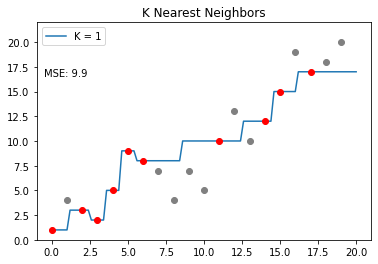

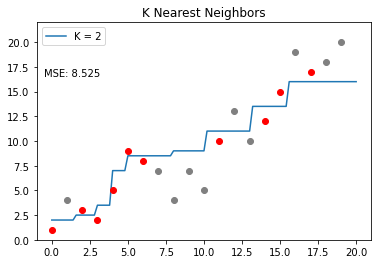

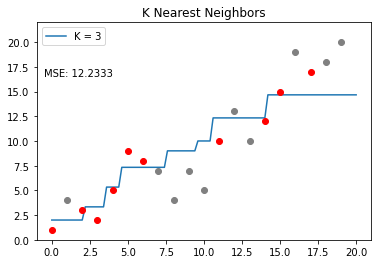

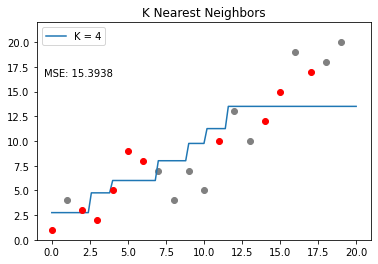

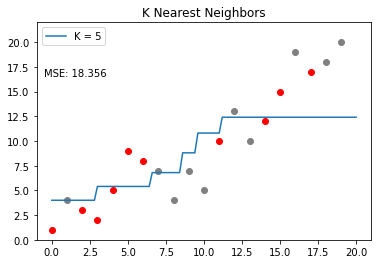

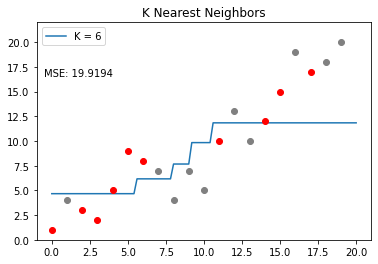

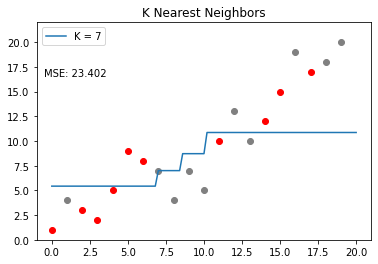

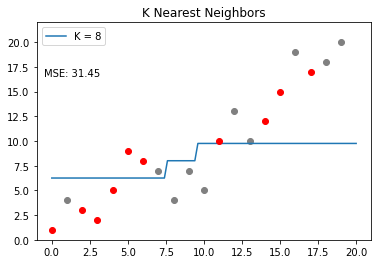

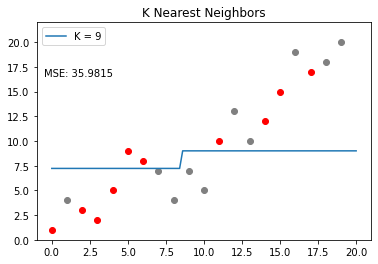

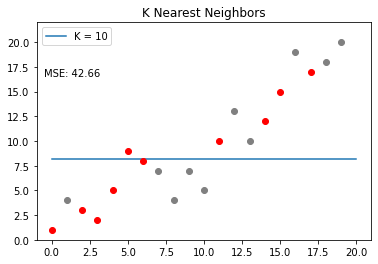

In [10]:
for k in range(1, len(x_train)+1):             # For each possible K
    
    x_pred, y_pred = all_knn(k)                # Perform K-NN
    
    error = mean_squared_error(x_pred, y_pred) # Calculate Error
    
    generate_figures("C:/Users/William/Documents/_UL/K-NN/Figures/", k, x_pred, y_pred, error) # And plot!

### Test how normalization of values improves accuracy

#### According to wikipedia, normalizing the data dramatically improves the error. Let's see if this works!

In [13]:
# Use this function to normalize the original data
# then run it!

def normalize(data):
    return [(point/max(data)) for point in data]

[0.2320675105485232, 0.19983591186122832, 0.2867635568057509, 0.36084739803094235, 0.43028598218471636, 0.46693493775069017, 0.5485710458585684, 0.7372245663384903, 0.8434477609348682, 1.0]


In [12]:
# Accomplished with reference to
# https://harvard-iacs.github.io/2019-CS109A/lectures/lecture4/presentation/Lecture4_kNNRegression.pdf (First intro to K-NN)
# https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm (Helping with understanding K-NN, gave me the normalization idea)
# https://stackoverflow.com/questions/12141150/from-list-of-integers-get-number-closest-to-a-given-value (Brilliant way to find the closest value in a list!)